# Fourth-order PDEs

In [1]:
include("smij-functions.jl");

Consider the **beam equation**

$$
\partial_{xxxx} u = f(x), \quad u(\pm1) = \partial_x u(\pm1) = 0. 
$$

These are known as *clamped* boundary conditions. One way to approach this problem is to introduce $v=u_x$ and solve the system

$$
\partial_x u - v &= 0, \\ 
\partial_{xxx} v &= f,
$$

with both $u$ and $v$ zero at the endpoints.

### p38: solve $u_{xxxx} = e^x,\; u(-1)=u(1)=u'(-1)=u'(1)=0$

In [2]:
# Construct discrete biharmonic operator:
N = 25

D, x = cheb(N)
D³ = (D^3)[2:N, 2:N]
B = [ D[2:N, 2:N] -I; zeros(N-1,N-1) D³ ]

f = @. exp(x[2:N])
rhs = [zeros(N-1); f]

# Solve boundary-value problem and plot result:
w = B \ rhs
u = [0; w[1:N-1]; 0]


# clf()
# axes([0.1, 0.4, 0.8, 0.5])
# plot(x, u, ".", markersize=10)
# axis([-1, 1, -0.01, 0.06])
# grid(true)
# xx = (-1:0.01:1)
# uu = (1 .- xx .^ 2) .* fit(x, S * u).(xx)
# plot(xx, uu)

# # Determine exact solution and print maximum error:
# A = [1 -1 1 -1; 0 1 -2 3; 1 1 1 1; 0 1 2 3]
# V = xx .^ (0:3)'
# c = A \ exp.([-1, -1, 1, 1])
# exact = exp.(xx) - V * c
# title("max err = $(round(norm(uu-exact,Inf),sigdigits=5))", fontsize=12)

26-element Vector{Float64}:
  0.0
  0.5810297149815005
 -0.00021698699492271806
  0.5799375661272856
 -0.0035142552234543258
  0.5724448708481434
 -0.01775765939811922
  0.5485600054021947
 -0.05413256638243514
  0.4973774714416318
 -0.12139367278952991
  0.4142446709549527
 -0.21847490192824237
  0.30682536461452553
 -0.3312535120812895
  0.19446568000247993
 -0.4373440399776851
  0.09980585689780255
 -0.5167610080996635
  0.03764904376561979
 -0.5615891685695557
  0.008431013280036108
 -0.5782559885672353
  0.0005680679535045735
 -0.5810070325646025
  0.0

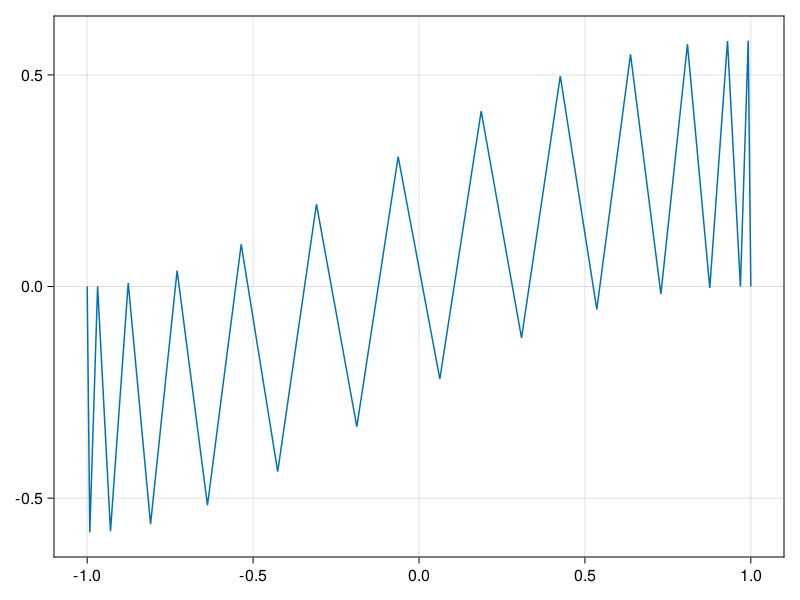

In [3]:
using CairoMakie
lines(x,u)